# Índice

1. [Exploración inicial y preparación de los datos](#1.-Exploración-inicial-y-preparación-de-los-datos)

    1.1. [Datos sobre la capacidad de generación de energía en España y su precio](#.1.1.-Datos-sobre-la-capacidad-de-generación-de-energía-en-España-y-su-precio)

    1.2. [Datos sobre las condiciones metereológicas en España](#-1.2.-Datos-sobre-las-condiciones-metereológicas-en-España)

2. [Análisis univariante](#)
3. [Análisis bivariante](#)


## 1. Exploración inicial y preparación de los datos

In [413]:
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import visualizacion_analisis as viz

In [414]:
#Creamos los DataFrames
df_energia = pd.read_csv("./data/energy_dataset.csv")
df_meteo = pd.read_csv("./data/weather_features.csv")

Visualizamos los datos sobre la energía

In [415]:
df_energia.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [416]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

Visualizamos los datos sobre las condiciones metereológicas

In [417]:
df_meteo.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [418]:
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

### 1.1. Datos sobre la capacidad de generación de energía en España y su precio

Convertimos el tipo de la columna "time" al formato adecuado y lo usamos como índice del DataFrame

In [419]:
df_energia["time"] = pd.to_datetime(df_energia["time"], utc=True)
df_energia["time"] = df_energia["time"].dt.tz_convert("Europe/Madrid")
df_energia.set_index("time",inplace=True)

Para el propósito del presente EDA no necesitaremos ciertas columnas, por lo que eliminamos del DataFrame:
1. La columna "generation hydro pumped storage aggregated", ya que solo contiene nulos
2. Las columnas de previsiones "forecast solar day ahead", "forecast wind offshore eday ahead", "forecast wind onshore day ahead", "total load forecast" y "price day ahead"
3. La columna "total load actual"

In [420]:
columnas_eliminar_energia = ["generation hydro pumped storage aggregated","forecast solar day ahead","forecast wind offshore eday ahead","forecast wind onshore day ahead","total load forecast", "price day ahead", "total load actual"]
df_energia.drop(columns=columnas_eliminar_energia,inplace=True)

Evaluamos el porcentaje de valores nulos en cada columna para decidir cómo tratarlos

In [421]:
columna_maximo = ""
porcentaje_maximo = 0

for columna in df_energia.columns:
    porcentaje_nulos = (df_energia[columna].isna().sum()/len(df_energia))*100
    print(f"el porcentaje de nulos de la columna {columna} es: {porcentaje_nulos.round(2)}%")
    if porcentaje_nulos > porcentaje_maximo:
        columna_maximo = columna
        porcentaje_maximo = porcentaje_nulos

if columna_maximo !="":
    print(f"\nEl máximo porcentaje de nulos se da en la columna '{columna_maximo}' y es un {porcentaje_maximo.round(2)}%")
else:
    print("Ninguna columna tiene valores nulos") 

el porcentaje de nulos de la columna generation biomass es: 0.05%
el porcentaje de nulos de la columna generation fossil brown coal/lignite es: 0.05%
el porcentaje de nulos de la columna generation fossil coal-derived gas es: 0.05%
el porcentaje de nulos de la columna generation fossil gas es: 0.05%
el porcentaje de nulos de la columna generation fossil hard coal es: 0.05%
el porcentaje de nulos de la columna generation fossil oil es: 0.05%
el porcentaje de nulos de la columna generation fossil oil shale es: 0.05%
el porcentaje de nulos de la columna generation fossil peat es: 0.05%
el porcentaje de nulos de la columna generation geothermal es: 0.05%
el porcentaje de nulos de la columna generation hydro pumped storage consumption es: 0.05%
el porcentaje de nulos de la columna generation hydro run-of-river and poundage es: 0.05%
el porcentaje de nulos de la columna generation hydro water reservoir es: 0.05%
el porcentaje de nulos de la columna generation marine es: 0.05%
el porcentaje d

Para la columna con mayor porcentaje de nulos, éstos sólo suponen un 0,1% . A la luz de este resultado, podemos eliminar del DataFrame cualquier fila que contenga algún nulo sin provocar un sesgo importante

In [422]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil coal-derived gas           35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation fossil oil shale                  35046 non-null  float64
 7   generation fossil peat                       35046 non-null  float64
 8   generation geothermal                        35046 non-null  float64
 9   generation hydro pumped s

In [423]:
df_energia.dropna(how="any",inplace=True)

Agrupamos los datos por dias en vez de por horas para tener un DataFrame mas manejable de cara al análisis

In [424]:
df_energia = df_energia.groupby(df_energia.index.date).mean()
df_energia.index = pd.to_datetime(df_energia.index)
df_energia.rename_axis("fecha",inplace=True)

Categorizamos la energía generada en cuatro grandes tipos:
* Energía fósil
* Energía renovable
* Energía nuclear
* Otro tipo de energía

Creamos cuatro nuevas columnas con la suma de la energía generada por tipos

In [425]:
df_energia["capacidad_fosil_media"] = df_energia["generation fossil brown coal/lignite"] + df_energia["generation fossil coal-derived gas"] \
                                    + df_energia["generation fossil gas"] + df_energia["generation fossil hard coal"] + df_energia["generation fossil oil"] \
                                    + df_energia["generation fossil oil shale"] + df_energia["generation fossil peat"]
                                    
df_energia["capacidad_renovable_media"] = df_energia["generation biomass"] + df_energia["generation geothermal"] + df_energia["generation hydro pumped storage consumption"] \
                                        + df_energia["generation hydro run-of-river and poundage"] + df_energia["generation hydro water reservoir"] \
                                        + df_energia["generation marine"] + df_energia["generation other renewable"] + df_energia["generation solar"] \
                                        + df_energia["generation waste"] + df_energia["generation wind offshore"] + df_energia["generation wind onshore"]
                                        
df_energia["capacidad_nuclear_media"] = df_energia["generation nuclear"]

df_energia["capacidad_otros_media"] = df_energia["generation other"]

Sobre una copia del DataFrame, eliminamos las columnas originales tras la agrupación

In [426]:
df_energia_agrupado = df_energia.copy()

columnas_eliminar = ["generation fossil brown coal/lignite","generation fossil coal-derived gas","generation fossil gas","generation fossil hard coal","generation fossil oil",\
                    "generation fossil oil shale","generation fossil peat","generation biomass","generation geothermal","generation hydro pumped storage consumption",\
                    "generation hydro run-of-river and poundage","generation hydro water reservoir","generation marine","generation other renewable","generation solar",\
                    "generation waste","generation wind offshore","generation wind onshore","generation nuclear","generation other"]

df_energia_agrupado.drop(columns=columnas_eliminar,inplace=True)

Renombramos el resto de columnas y el índice con su nombre en español

In [427]:
df_energia_agrupado.rename(columns={"price actual":"precio_medio"}, inplace=True)

Mostramos el contenido final del DataFrame

In [428]:
df_energia_agrupado.head()

,precio_medio,capacidad_fosil_media,capacidad_renovable_media,capacidad_nuclear_media,capacidad_otros_media
fecha,,,,,
2015-01-01,62.148750,8920.916667,9841.666667,7097.000000,42.250000
2015-01-02,69.327083,4976.291667,19661.666667,7105.833333,44.250000
2015-01-03,65.706667,5015.125000,17680.708333,7095.375000,78.041667
2015-01-04,58.264167,6069.958333,16408.625000,7083.625000,83.708333
2015-01-05,75.357059,7591.058824,13868.058824,3932.176471,40.000000


In [429]:
df_energia_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2015-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   precio_medio               1461 non-null   float64
 1   capacidad_fosil_media      1461 non-null   float64
 2   capacidad_renovable_media  1461 non-null   float64
 3   capacidad_nuclear_media    1461 non-null   float64
 4   capacidad_otros_media      1461 non-null   float64
dtypes: float64(5)
memory usage: 68.5 KB


### 1.2. Datos sobre las condiciones metereológicas en España

Convertimos el tipo de la columna "dt_iso" al formato adecuado y lo usamos como índice del DataFrame

In [430]:
df_meteo["dt_iso"] = pd.to_datetime(df_meteo["dt_iso"], utc=True) 
df_meteo["dt_iso"] = df_meteo["dt_iso"].dt.tz_convert("Europe/Madrid")
df_meteo.set_index("dt_iso",inplace=True)

Al igual que para el DataFrame anterior, hay columnas que no son necesarías para el propósito del EDA y las eliminamos del DataFrame:
1. Las columnas de codificación "weather_id" y "weather_icon"
2. Las columnas de descripción "weather_main" y"weather_description"
3. Las columnas "temp_min" y "temp_max"
4. La columna "city_name"
5. Las columnas "rain_3h" y "snow_3h"

In [431]:
columnas_eliminar_meteo = ["weather_id","weather_main","weather_description","weather_icon","temp_min","temp_max", "city_name","rain_3h","snow_3h"]
df_meteo.drop(columns=columnas_eliminar_meteo,inplace=True)

No hay nulos entre los datos. Continuamos agrupando los datos por dias en vez de por horas para tener un DataFrame mas manejable de cara al análisis:

In [432]:
df_meteo = df_meteo.groupby([df_meteo.index.date]).mean()
df_meteo.index = pd.to_datetime(df_meteo.index)
df_meteo.rename_axis("fecha",inplace=True)

Renombramos el resto de columnas y el índice con su nombre en español

In [433]:
df_meteo.rename(columns={"temp":"temperatura_media","pressure":"presion_media","humidity":"humedad_media", \
                        "wind_speed":"velocidad_viento_media","wind_deg":"direccion_grados_media","rain_1h":"lluvia_1h_media","clouds_all":"cobertura_nubes_media"}, inplace=True)

Clasificamos de la dirección del viento en una nueva columna del DataFrame

In [434]:
#Definimos la funcion que hace la clasificacion
def clasificador_direccion(grados):
    if grados > 337.5:
        return "N"
    if grados > 292.5:
        return "NO"
    if grados > 247.5:
       return "O"
    if grados > 202.5:
        return "SO"
    if grados > 157.5:
        return "S"
    if grados>122.5:
        return "SE"
    if grados>67.5:
        return "E"
    if grados>22.5:
        return "NE"
    else:
        return "N"
    
df_meteo["direccion_viento_media"] = df_meteo["direccion_grados_media"].apply(clasificador_direccion)

Mostramos el contenido final del DataFrame

In [435]:
df_meteo.head()

,temperatura_media,presion_media,humedad_media,velocidad_viento_media,direccion_grados_media,lluvia_1h_media,cobertura_nubes_media,direccion_viento_media
fecha,,,,,,,,
2015-01-01,276.928845,1021.991667,75.391667,1.950000,181.600000,0.0000,0.766667,S
2015-01-02,277.897585,1024.441667,77.833333,1.575000,214.408333,0.0000,5.975000,SO
2015-01-03,278.817864,1020.741667,78.591667,1.575000,191.033333,0.0000,2.283333,S
2015-01-04,279.630031,1015.858333,76.766667,1.258333,156.408333,0.0425,11.433333,SE
2015-01-05,279.032920,1014.508333,81.158333,1.150000,174.300000,0.0125,17.816667,S


In [436]:
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2015-01-01 to 2018-12-31
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperatura_media       1461 non-null   float64
 1   presion_media           1461 non-null   float64
 2   humedad_media           1461 non-null   float64
 3   velocidad_viento_media  1461 non-null   float64
 4   direccion_grados_media  1461 non-null   float64
 5   lluvia_1h_media         1461 non-null   float64
 6   cobertura_nubes_media   1461 non-null   float64
 7   direccion_viento_media  1461 non-null   object 
dtypes: float64(7), object(1)
memory usage: 102.7+ KB


## 2. Análisis univariante

Comenzamos el análisis para el DataFrame de energía generada realizando la clasificación de las variables

In [437]:
df_energia_agrupado.head()

,precio_medio,capacidad_fosil_media,capacidad_renovable_media,capacidad_nuclear_media,capacidad_otros_media
fecha,,,,,
2015-01-01,62.148750,8920.916667,9841.666667,7097.000000,42.250000
2015-01-02,69.327083,4976.291667,19661.666667,7105.833333,44.250000
2015-01-03,65.706667,5015.125000,17680.708333,7095.375000,78.041667
2015-01-04,58.264167,6069.958333,16408.625000,7083.625000,83.708333
2015-01-05,75.357059,7591.058824,13868.058824,3932.176471,40.000000


In [438]:
df_energia_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2015-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   precio_medio               1461 non-null   float64
 1   capacidad_fosil_media      1461 non-null   float64
 2   capacidad_renovable_media  1461 non-null   float64
 3   capacidad_nuclear_media    1461 non-null   float64
 4   capacidad_otros_media      1461 non-null   float64
dtypes: float64(5)
memory usage: 68.5 KB


|Columna/Variable           | Descripción                             |Tipo de variable  |Importancia inicial  | Notas                                                                                               |
|---------------------------|-----------------------------------------|------------------|---------------------|-----------------------------------------------------------------------------------------------------|
|precio_energia_medio       | Precio de la energía en EUR/MWh        | Numérica continua| 1                   | Importante para el análisis ya que permitirá analizar la variación del precio según el tipo de energía generada             |
|capacidad_fosil_media     | capacidad de generación de energía fósil media diaria en MW            | Numérica continua| 1                   | Importante para el análisis ya que permitirá analizar el grado de generación de este tipo de energía  respecto a la renovable                 |
|capacidad_renovable_media | capacidad de generación de energía renovable media diaria en MW       | Numérica continua| 0                   | Variable directora ya que el análisis del EDA gira en torno a la capacidad de producción de energía renovable              |
|capacidad_nuclear_media   | capacidad de generación de energía nuclear media diaria en MW          | Numérica continua| 1                   | Importante para el análisis ya que permitirá analizar el grado de generación de este tipo de energía  respecto a la renovable                |
|capacidad_otros_media     | capacidad de generación de energía por otros medios media diaria en MW | Numérica continua| 1                   | Importante para el análisis ya que permitirá analizar el grado de generación de este tipo de energía respecto a la renovable       |

In [439]:
#Definimos una funcion para obtener la principales medidas de tendencia central
def medidas_tendencia_central(df,lista_columnas):
    df_medidas = df.describe()[lista_columnas].T.drop(columns=["count"]).round(2)
    
    #Incluimos el coeficiente de variacion
    df_medidas["coeficiente_variacion"] = 0.0
    for variable in df_medidas.index:
        cv = round((df_medidas.loc[variable, "mean"]/df_medidas.loc[variable, "std"])*100,2)
        df_medidas.loc[variable, "coeficiente_variacion"] = cv
    
    return df_medidas

In [440]:
#Mostramos las principales medidas de tendencia central de todo el DataFrame
medidas_tendencia_central(df_energia_agrupado,df_energia_agrupado.columns)

,mean,std,min,25%,50%,75%,max,coeficiente_variacion
precio_medio,57.88,12.08,14.48,50.88,58.66,66.63,99.20,479.14
capacidad_fosil_media,10625.42,3618.10,3251.25,7624.42,10830.38,13200.17,23151.46,293.67
capacidad_renovable_media,11689.92,3697.91,4659.79,8916.42,10932.88,13959.33,23958.29,316.12
capacidad_nuclear_media,6263.57,834.94,3734.88,5751.22,6586.83,7017.67,7113.12,750.18
capacidad_otros_media,60.23,19.86,5.88,53.58,57.62,80.21,95.88,303.27


La mayor parte de la capacidad de generación diaria de energía viene de la energía fósil y de la energía renovable, seguida de la energía nuclear y en última instancia (casi residual) la energía que proviene de otras fuentes de generación

### 2.1. Precio medio de la energía

(2,)


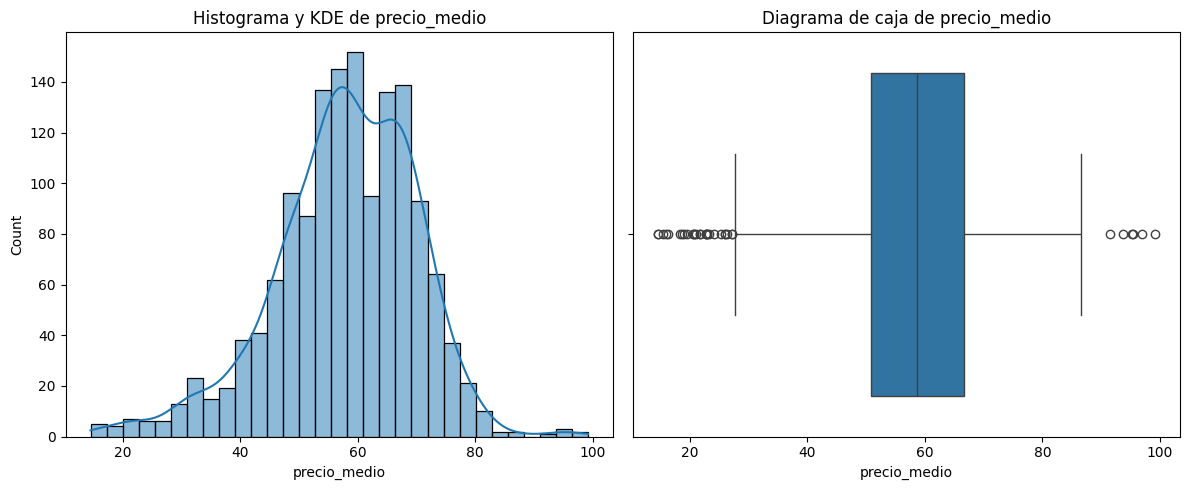

In [441]:
#Visualizamos el histograma, KDE y diagrama de caja
viz.multiples_combinados(df_energia_agrupado,["precio_medio"])

In [442]:
#Mostramos las principales medidas de tendencia central
medidas_tendencia_central(df_energia_agrupado,["precio_medio"])

,mean,std,min,25%,50%,75%,max,coeficiente_variacion
precio_medio,57.88,12.08,14.48,50.88,58.66,66.63,99.2,479.14


* Distribución con mucha simetría y cierta agrupación, aunque es muy dispersa
* La mediana del precio medio diario se situa en torno a 58 €/MWh
* Hay muchos *outliers* por debajo del *minimum* y por encima del *maximum* que hacen pensar en una alta sensibilidad en la variación del precio medio diario


### 2.2. Energía fósil generada

(2,)


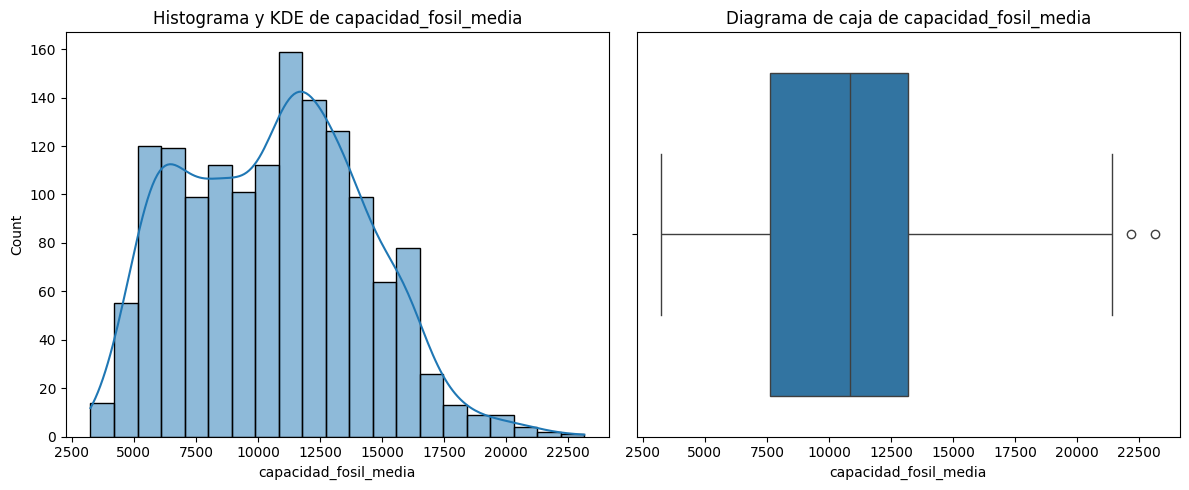

In [443]:
#Visualizamos el histograma, KDE y diagrama de caja
viz.multiples_combinados(df_energia_agrupado,["capacidad_fosil_media"])

In [444]:
#Mostramos las principales medidas de tendencia central
medidas_tendencia_central(df_energia_agrupado,["capacidad_fosil_media"])

,mean,std,min,25%,50%,75%,max,coeficiente_variacion
capacidad_fosil_media,10625.42,3618.1,3251.25,7624.42,10830.38,13200.17,23151.46,293.67


* Distribución asimétrica con poca agrupación y muy dispersa. 
* La mediana de capacidad de generación diaria de energía fósil se situa en torno a los 10800 MW
* Hay *outliers* por encima del *maximum*

In [448]:
df_energia_agrupado.loc[df_energia_agrupado["capacidad_fosil_media"]>22000]

,precio_medio,capacidad_fosil_media,capacidad_renovable_media,capacidad_nuclear_media,capacidad_otros_media
fecha,,,,,
2017-05-12,50.03125,23151.458333,6886.375,6043.000000,56.291667
2017-11-16,73.43000,22191.083333,5735.375,5047.291667,14.958333


Para estos valores de alta capacidad de generación de energía fósil se observa una baja capacidad de generación de energía renovable. Se intuye la complementación de estos dos tipos de generación

### 2.3. Energía renovable generada

(2,)


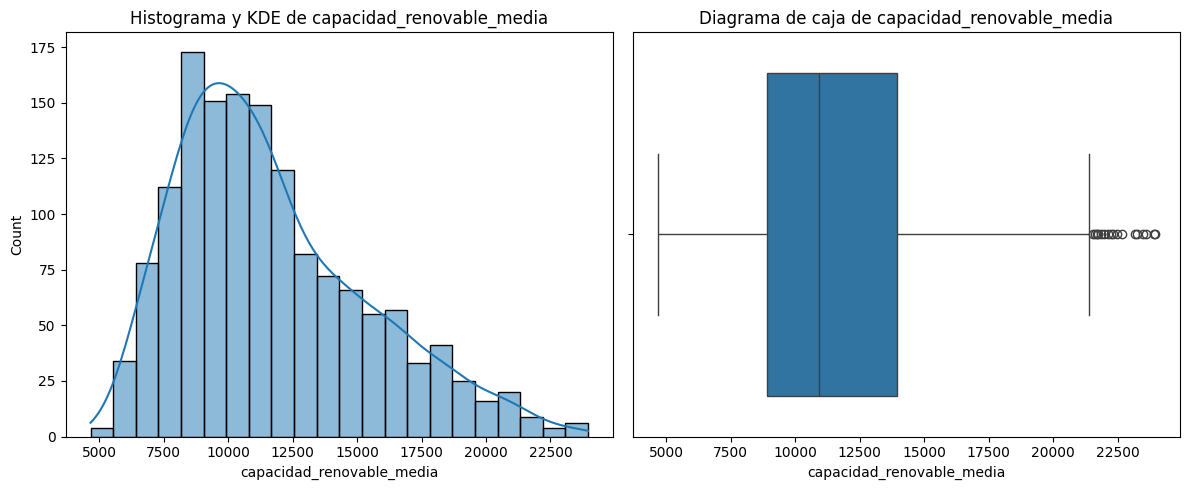

In [449]:
#Visualizamos el histograma, KDE y diagrama de caja
viz.multiples_combinados(df_energia_agrupado,["capacidad_renovable_media"])

In [450]:
#Mostramos las principales medidas de tendencia central
medidas_tendencia_central(df_energia_agrupado,["capacidad_renovable_media"])

,mean,std,min,25%,50%,75%,max,coeficiente_variacion
capacidad_renovable_media,11689.92,3697.91,4659.79,8916.42,10932.88,13959.33,23958.29,316.12


* Distribución asimétrica con poca agrupación y muy dispersa
* La mediana de capacidad de generación diaria de energía renovable se situa en torno a los 10932 MW
* Hay *outliers* por encima del *maximum* que sugieren un análisis específico de su relación con las condiciones metereológicas

In [455]:
df_energia_agrupado[df_energia_agrupado["capacidad_renovable_media"]>21000]

,precio_medio,capacidad_fosil_media,capacidad_renovable_media,capacidad_nuclear_media,capacidad_otros_media
fecha,,,,,
2015-01-30,46.515000,5530.625000,21868.833333,7097.666667,44.500000
2015-01-31,31.167500,4145.458333,21019.208333,7101.791667,42.208333
2015-02-23,44.846250,5343.583333,21707.250000,7104.583333,84.583333
2015-02-24,41.637083,5563.750000,22674.375000,7105.125000,85.708333
2015-02-25,48.738750,6066.708333,21063.750000,7101.416667,80.000000
2015-05-03,55.097500,5823.875000,21043.208333,6181.333333,82.458333
2016-02-13,18.900417,3926.541667,23585.000000,3800.041667,90.583333
2016-02-14,18.262500,3724.458333,21386.333333,3734.875000,91.583333
2016-02-15,29.992083,5172.333333,23487.625000,4137.083333,94.041667


Además, para estos valores de alta capacidad de generación de energía renovable se observa una baja capacidad de generación de energía fósil. Se intuye de nuevo la complementación de estos dos tipos de generación de energía mayoritarios para satisfacer la demanda

### 2.4. Energía nuclear generada

(2,)


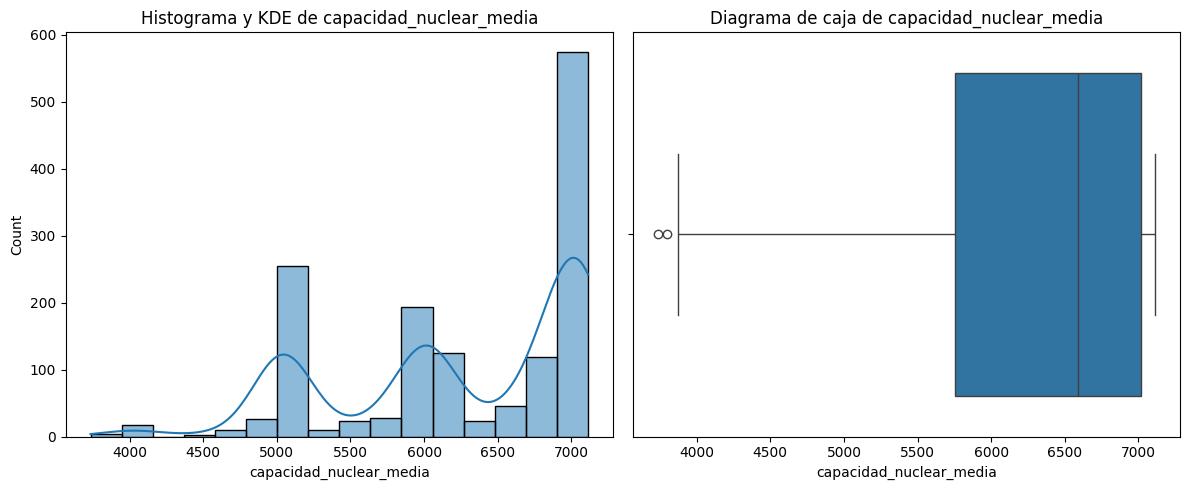

In [456]:
#Visualizamos el histograma, KDE y diagrama de caja
viz.multiples_combinados(df_energia_agrupado,["capacidad_nuclear_media"])

In [458]:
#Mostramos las principales medidas de tendencia central
medidas_tendencia_central(df_energia_agrupado,["capacidad_nuclear_media"])

,mean,std,min,25%,50%,75%,max,coeficiente_variacion
capacidad_nuclear_media,6263.57,834.94,3734.88,5751.22,6586.83,7017.67,7113.12,750.18


* Distribución asimétrica y muy característica con cierto rango de valores predominantes y muy dispersa
* La mediana de capacidad de generación diaria de energía nuclear se situa en torno a los 6500 MW
* Hay *outliers* por debajo del *minimum*

In [462]:
df_energia_agrupado[df_energia_agrupado["capacidad_nuclear_media"]<3850]

,precio_medio,capacidad_fosil_media,capacidad_renovable_media,capacidad_nuclear_media,capacidad_otros_media
fecha,,,,,
2016-02-13,18.900417,3926.541667,23585.000000,3800.041667,90.583333
2016-02-14,18.262500,3724.458333,21386.333333,3734.875000,91.583333


Estos valores de baja capacidad de generación de energía nuclear coinciden con una alta capacidad de generación de energía renovable. Esto sugiere una relación similar a la que se intuye entre la generación de energía fosil y la generación de energía renovable

### 2.5. Energía generada por otros medios

(2,)


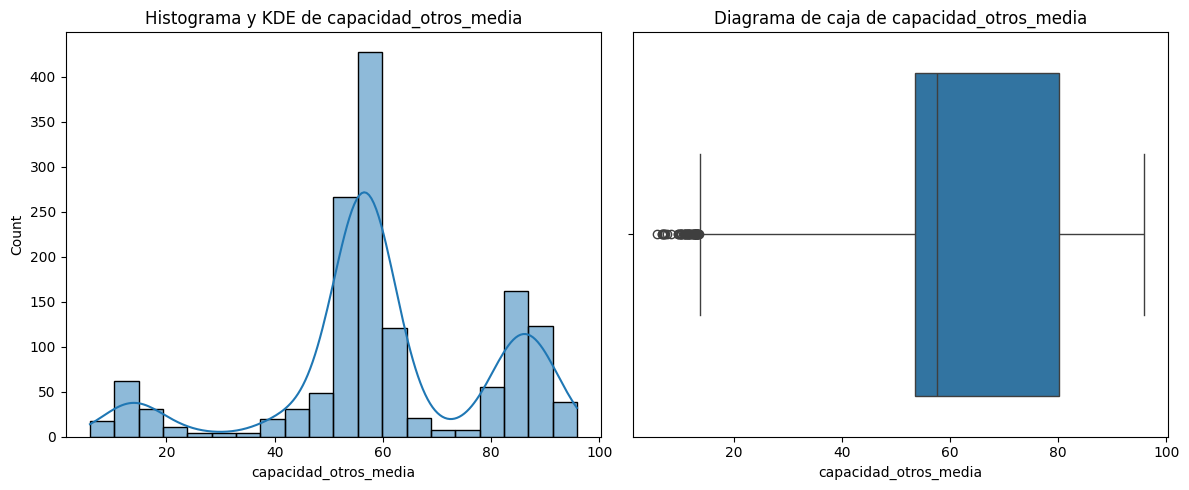

In [463]:
#Visualizamos el histograma, KDE y diagrama de caja
viz.multiples_combinados(df_energia_agrupado,["capacidad_otros_media"])

In [464]:
#Mostramos las principales medidas de tendencia central
medidas_tendencia_central(df_energia_agrupado,["capacidad_otros_media"])

,mean,std,min,25%,50%,75%,max,coeficiente_variacion
capacidad_otros_media,60.23,19.86,5.88,53.58,57.62,80.21,95.88,303.27


* Distribución asimétrica y muy característica con cierto rango de valores predominantes y muy dispersa
* La mediana de capacidad de generación diaria de energía por otros medios se situa en torno a los 57 MW
* Hay muchos *outliers* por debajo del *minimum*

In [469]:
df_energia_agrupado[df_energia_agrupado["capacidad_otros_media"]<15]

,precio_medio,capacidad_fosil_media,capacidad_renovable_media,capacidad_nuclear_media,capacidad_otros_media
fecha,,,,,
2016-01-05,42.345417,3961.333333,20107.916667,5086.541667,11.000000
2016-01-06,27.638333,6172.208333,14228.250000,6079.208333,11.333333
2016-03-05,19.459167,5127.708333,17476.500000,5082.416667,14.541667
2016-04-30,32.865000,4462.166667,17177.541667,5087.625000,11.583333
2016-05-13,28.472500,5509.250000,18636.375000,5095.125000,10.291667
...,...,...,...,...,...
2018-06-04,63.657083,6145.416667,19508.791667,6019.083333,13.125000
2018-07-04,67.649167,5706.666667,14403.750000,6010.333333,7.208333
2018-08-04,70.772500,5504.833333,16787.833333,5837.833333,12.458333


Al igual que para la capacidad de generación de energía nuclear, la baja capacidad de generación de energía por otros medios coincide con una media/alta capacidad de generación de energía renovable. Esto sugiere una relación similar a la que se intuye entre la generación de energía fosil/generación de energía nuclear y la generación de energía renovable

Como conclusión al análisis univariante diría que la capacidad de generación de energía renovable "marca" el mix de generación energética en España. En función de la capacidad de generación de energía renovable se hace uso de los otros tipos de generación de energía (fósil, nuclear y por otros medios) para satisfacer la demanda

## 3. Análisis multivariante

In [480]:

#Calculo la matriz de correlacion
corr_matrix = df_energia_agrupado.corr(numeric_only=True)
corr_matrix

,precio_medio,capacidad_fosil_media,capacidad_renovable_media,capacidad_nuclear_media,capacidad_otros_media
precio_medio,1.000000,0.495524,-0.353128,-0.062631,0.099771
capacidad_fosil_media,0.495524,1.000000,-0.672668,-0.083524,0.101065
capacidad_renovable_media,-0.353128,-0.672668,1.000000,0.010292,0.049216
capacidad_nuclear_media,-0.062631,-0.083524,0.010292,1.000000,0.041308
capacidad_otros_media,0.099771,0.101065,0.049216,0.041308,1.000000


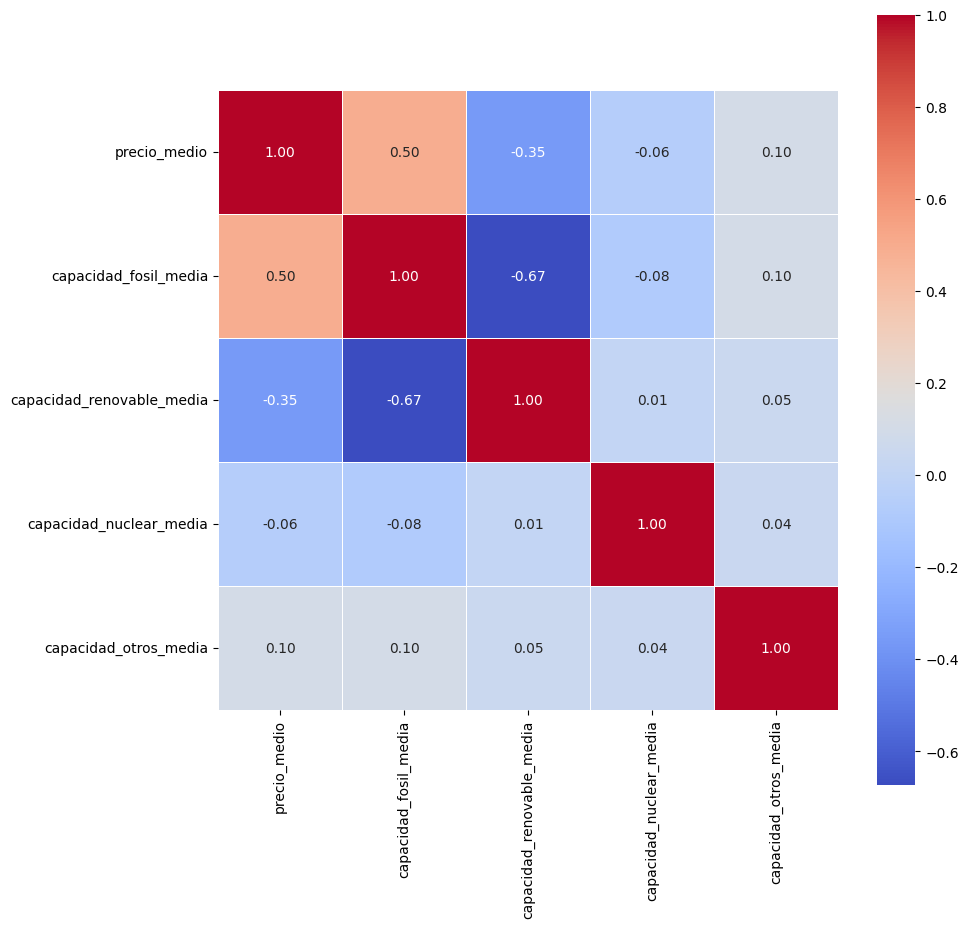

In [481]:
#Muestro el Heatmap por años
fig, axs = plt.subplots(1,1,figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=.5)

plt.show()

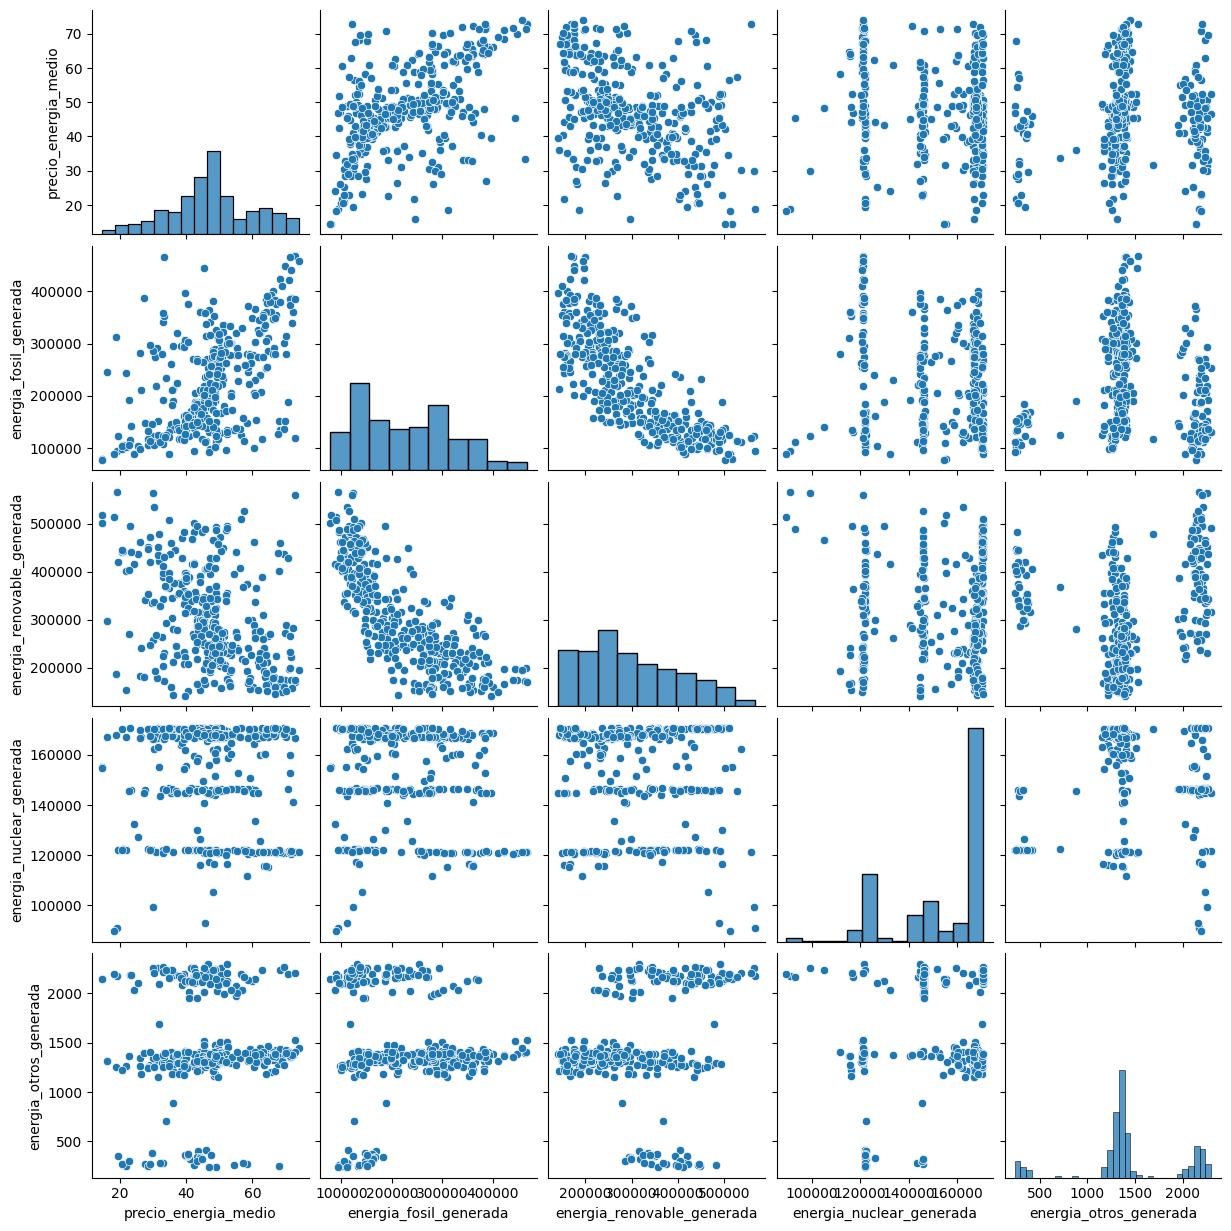

In [120]:
#Muestro el Pairplot
sns.pairplot(df_energia_agrupado.loc[df_energia_agrupado.index.year==2016])
plt.show()

## 3. Análisis univariante de las condiciones climáticas en España


KeyError: 'velocidad_viento'

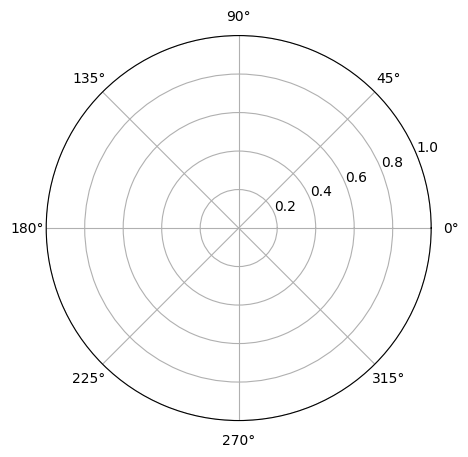

In [121]:
#Dibujamos la rosa de los vientos
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(5,5))
    
#Convertir grados a radianes
direcciones_rad = np.radians(df_meteo.loc[df_meteo["velocidad_viento"]>1, "direccion_grados"])
    
#Histograma polar
ax.hist(direcciones_rad, bins=50, color="steelblue", alpha=0.5)
    
#Ponemos el cero apuntando al Norte
ax.set_theta_zero_location('N')

#Los grados avanzan en el grafico en sentido horario
ax.set_theta_direction(-1)

#Quitamos la rejilla y los valores
ax.set_yticklabels([])
ax.set_yticks([])

#Quitamos la rejilla de los grados
ax.grid(False)

#Definimos el titulo
plt.title("Rosa de los Vientos")
    
plt.tight_layout() #para que se muestre limpio
plt.show()